<a href="https://colab.research.google.com/github/Ekaterina-Meshkova/BH_HWs/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка, анализ и предварительная подготовка датасета

In [12]:
# Загрузка датасета
data = pd.read_csv('/content/International_Education_Costs.csv')

In [13]:
# Предварительный просмотр

# 5 строк
print('Первые 5 строк датасета:')
print(data.head())

# инфо
print("Информация о датасете:")
print(data.info())

Первые 5 строк датасета:
     Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800          

In [14]:
# Просмотр статистики
print("Cтатистика датасета:")
print(data.describe(include='all'))

Cтатистика датасета:
       Country       City                University           Program   Level  \
count      907        907                       907               907     907   
unique      71        556                       622                92       3   
top         UK  Singapore  University of Washington  Computer Science  Master   
freq        93         18                         6               312     451   
mean       NaN        NaN                       NaN               NaN     NaN   
std        NaN        NaN                       NaN               NaN     NaN   
min        NaN        NaN                       NaN               NaN     NaN   
25%        NaN        NaN                       NaN               NaN     NaN   
50%        NaN        NaN                       NaN               NaN     NaN   
75%        NaN        NaN                       NaN               NaN     NaN   
max        NaN        NaN                       NaN               NaN     NaN   

      

In [15]:
# Очистка данных
data_clean = data.copy()

# Удаление ненужных столбцов
cols_to_drop = ['University', 'Living_Cost_Index', 'Duration_Years', 'Program',
                'Level ', 'Exchange_Rate']
data_clean.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Удаление строк с отсутствующей критической информацией
data_clean = data_clean.dropna(subset=['Country', 'Tuition_USD', 'Visa_Fee_USD', 'Insurance_USD'])

Создание базы данных SQLite и таблицы

In [16]:
# Создание базы данных
conn = sqlite3.connect('education_eosts.db')
cursor = conn.cursor()

In [17]:
# Подключение к базе данных SQLite
conn = sqlite3.connect('data.db')
cursor = conn.cursor()

# Создание таблицы
cursor.execute (''' CREATE TABLE IF NOT EXISTS EDU_Costs (
  id INTEGER PRIMARY KEY,
  Country TEXT,
  City TEXT,
  'Tuition USD' INTEGER,
  'Rent USD' INTEGER,
  'Visa Fee USD' INTEGER,
  'Insurance USD' INTEGER)
''')

In [18]:
# Импорт данных
data_clean.to_sql('EDU_Costs', conn, if_exists='replace', index=False)
conn.commit()

SQL-запросы с фильтрами

In [57]:
# Вывод стоимости Rent_USD для Country= UK

query = '''
SELECT City, Rent_USD
FROM EDU_Costs
WHERE "Country" =  'UK'
'''
# Выполнение запроса
result = pd.read_sql(query, conn)

# Вывод результата
print(result)

          City  Rent_USD
0       London      1800
1      Bristol      1100
2       Oxford      1600
3    Cambridge      1700
4      Glasgow      1100
..         ...       ...
88  Manchester       900
89     Bristol      1200
90     Glasgow       950
91       Leeds       900
92  Nottingham       800

[93 rows x 2 columns]


  Country       City  Rent_USD
0      UK     London      1800
1      UK    Bristol      1100
2      UK     Oxford      1600
3      UK  Cambridge      1700
4      UK    Glasgow      1100


Text(0, 0.5, 'Аренда')

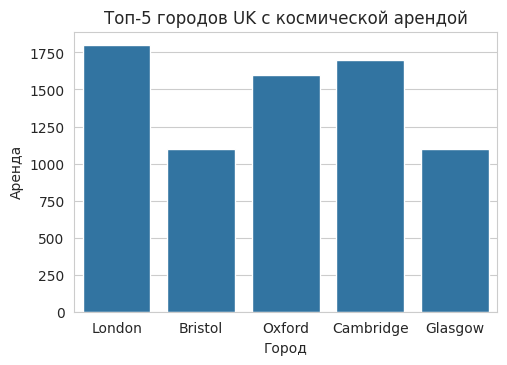

In [70]:
# Вывод Топ-5 городов UK с космической арендой

query = '''
SELECT Country, City, Rent_USD
FROM EDU_Costs
WHERE "Country" =  'UK'
ORDER BY 'Rent USD' DESC
LIMIT 5
'''
result = pd.read_sql(query, conn)

# Вывод результата
print(result)

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Визуализация
plt.subplot(2, 2, 3)
result = pd.read_sql(query, conn)
sns.barplot(x='City', y='Rent_USD', data= result)
plt.title('Топ-5 городов UK с космической арендой')
plt.xlabel('Город')
plt.ylabel('Аренда')

SQL-запросы с агрегатными функциями

In [55]:
# Средняя стоимость аренды по UK

query = '''
SELECT  Country, AVG ('Rent USD') as avg_rent_UK
FROM EDU_Costs
WHERE "Country" =  'UK'
ORDER BY Country
'''
# Выполнение запроса
result = cursor.fetchall()

# Вывод результата
print("Средняя стоимость аренды по странам:")
print(f"Страна: {row[0]}, средняя: {row[2]}")

Средняя стоимость аренды по странам:
Страна: UK, средняя: 1100


          City  city_count
0    Singapore          18
1       Sydney          11
2    Melbourne          11
3       London          10
4     Canberra           8
5    Newcastle           7
6     Brisbane           7
7        Seoul           6
8      Seattle           6
9    Cambridge           6
10  Wollongong           5
11       Perth           5
12    Montreal           5
13  Manchester           5
14       Leeds           5
15      Hobart           5
16  Gold Coast           5
17     Bristol           5
18      Boston           5
19      Austin           5


<ipython-input-67-3212462593b4>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_count', y='City', data= result, palette='viridis')


Text(0, 0.5, 'Город')

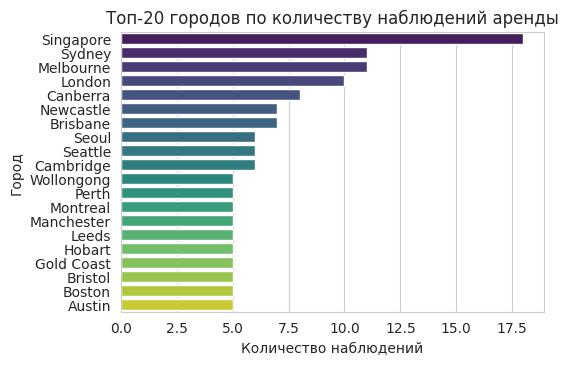

In [67]:
# Количество наблюдений по городам

query = '''
SELECT City, COUNT(*) as city_count
FROM EDU_Costs
GROUP BY "City"
ORDER BY city_count DESC
LIMIT 20
'''

# Выполнение запроса
result = pd.read_sql(query, conn)

# Вывод результата
print(result)

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Визуализация
plt.subplot(2, 2, 1)
sns.barplot(x='city_count', y='City', data= result, palette='viridis')
plt.title('Топ-20 городов по количеству наблюдений аренды')
plt.xlabel('Количество наблюдений')
plt.ylabel('Город')


In [ ]:
# Закрытие соединения
conn.commit()
conn.close()